# Feature Scaling

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
ds = pd.read_csv("loan-train.csv")
ds.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [6]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         5
Loan_Status           0
dtype: int64

In [7]:
ds["ApplicantIncome"] = ds["ApplicantIncome"].fillna(ds["ApplicantIncome"].mean())

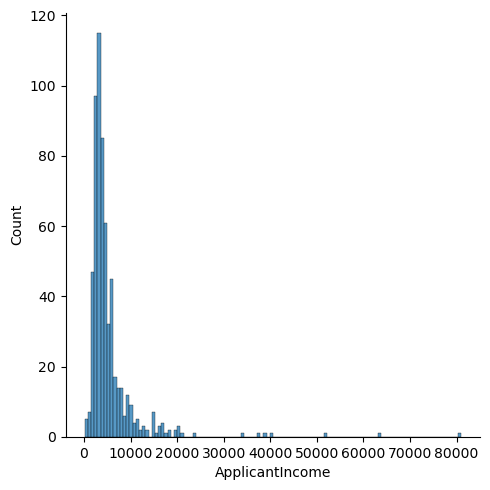

In [8]:
sns.displot(ds["ApplicantIncome"])

In [9]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Feature Scaling(Standardization)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()
ss.fit(ds[["ApplicantIncome"]])

StandardScaler()

In [13]:
ds["ApplicantIncome_ss"]=pd.DataFrame(ss.transform(ds[["ApplicantIncome"]]), columns=["x"])
ds.head(3)                                      

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [14]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


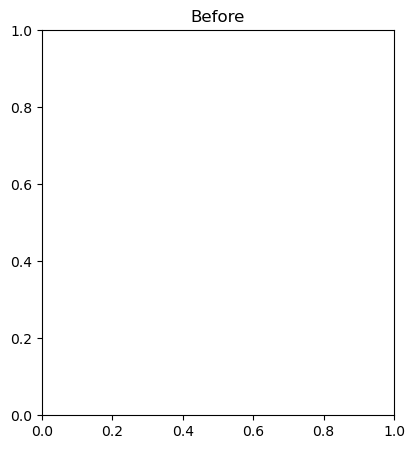

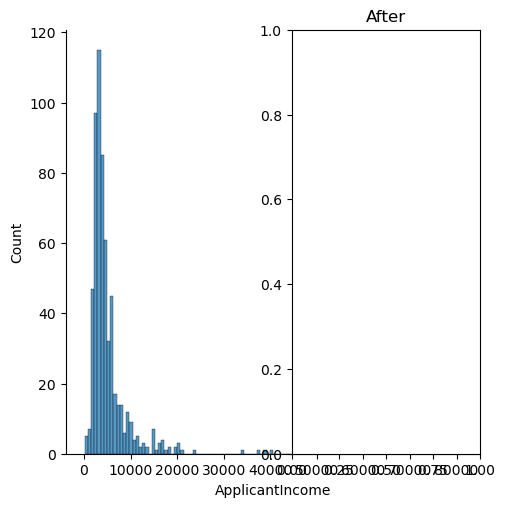

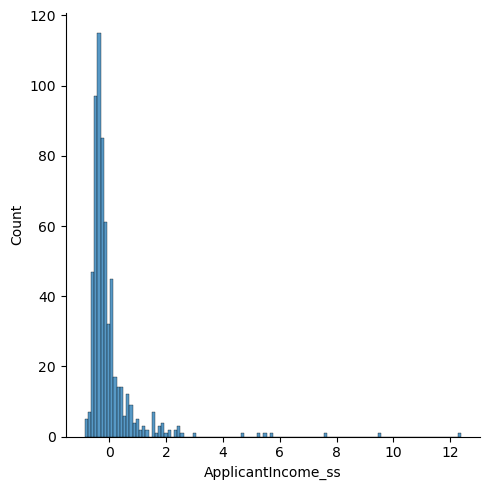

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(x="ApplicantIncome", data=ds)
plt.subplot(1,2,2)
plt.title("After")
sns.displot(x="ApplicantIncome_ss", data=ds)

plt.show()

## Feature Scaling(Normalization)

In [31]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


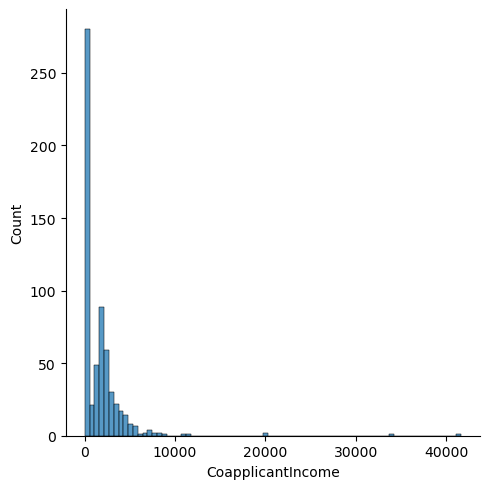

In [35]:
sns.displot(ds["CoapplicantIncome"])

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
ms = MinMaxScaler()
ms.fit(ds[["CoapplicantIncome"]])

MinMaxScaler()

In [51]:
ds["CoapplicantIncome_min"] = ms.transform(ds[["CoapplicantIncome"]])

In [53]:
ds.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


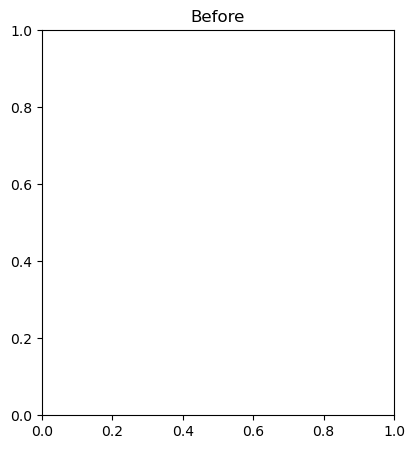

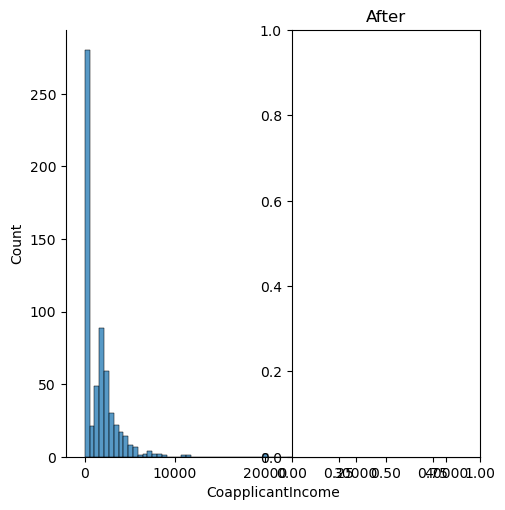

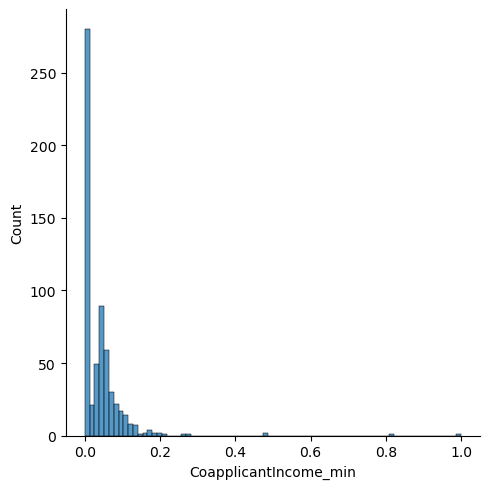

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(ds["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.displot(ds["CoapplicantIncome_min"])

plt.show()